<a href="https://colab.research.google.com/github/fuenqi/sentiment-analysis/blob/main/ML_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


TypeError: ignored

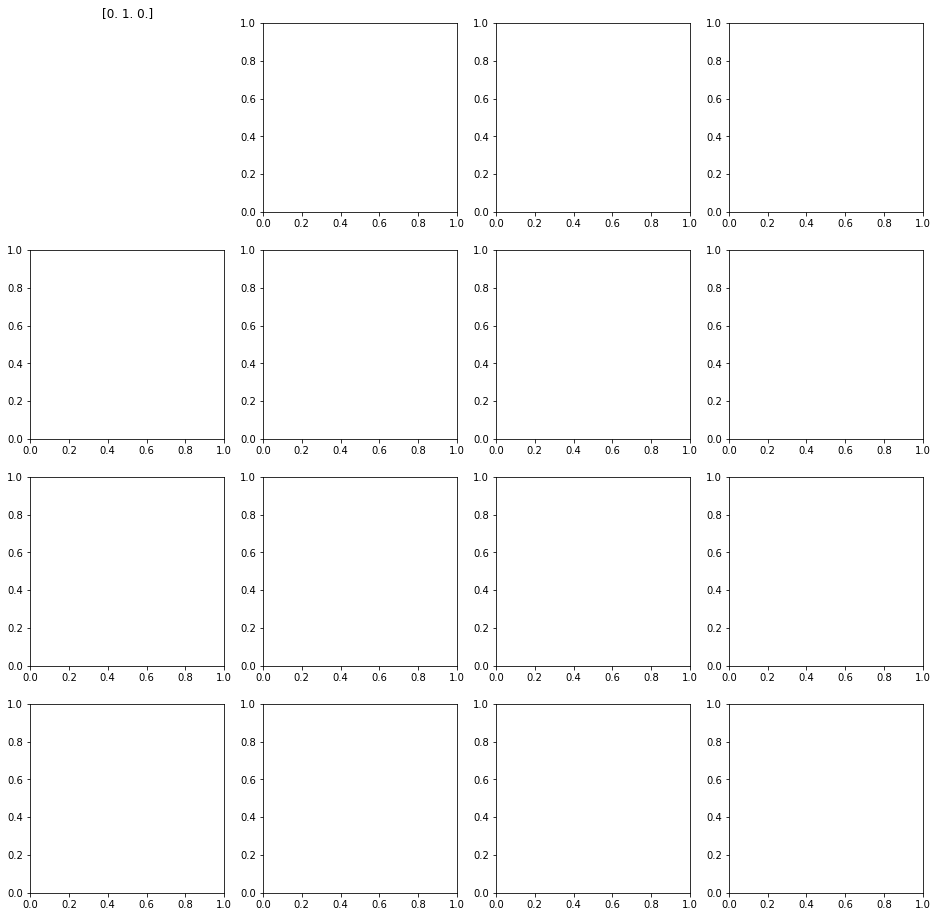

In [76]:
import os
import urllib.request as http
from zipfile import ZipFile

import tensorflow as tf
import numpy as np
from PIL import Image
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import save_model, load_model

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


def load_cifar10(num_classes=3):
    """
    Downloads CIFAR-10 dataset, which already contains a training and test set,
    and return the first `num_classes` classes.
    Example of usage:
    >>> (x_train, y_train), (x_test, y_test) = load_cifar10()
    :param num_classes: int, default is 3 as required by the assignment.
    :return: the filtered data.
    """
    (x_train_all, y_train_all), (x_test_all, y_test_all) = cifar10.load_data()

    fil_train = tf.where(y_train_all[:, 0] < num_classes)[:, 0]
    fil_test = tf.where(y_test_all[:, 0] < num_classes)[:, 0]

    y_train = y_train_all[fil_train]
    y_test = y_test_all[fil_test]

    x_train = x_train_all[fil_train]
    x_test = x_test_all[fil_test]

    return (x_train, y_train), (x_test, y_test)
def plot_sample(imgs, labels, nrows, ncols, resize=None, tograyscale=False):
    # create a grid of images
    fig, axs = plt.subplots(nrows, ncols, figsize=(4*ncols, 4*nrows))
    # take a random sample of images
    indices = np.random.choice(len(imgs), size=nrows*ncols, replace=False)
    for ax, idx in zip(axs.reshape(-1), indices):
        ax.axis('off')
        # sample an image
        ax.set_title(labels[idx])
        im = imgs[idx]
        if isinstance(im, np.ndarray):
            im = Image.fromarray(im)  
        if resize is not None:
            im = im.resize(resize)
        if tograyscale:
            im = im.convert('L')
        ax.imshow(im, cmap='gray')
plot_sample(x_train, y_train, 4, 4)


def make_dataset(imgs, labels, label_map, img_size, rgb=True, keepdim=True, shuffle=True):
    x = []
    y = []
    n_classes = len(list(label_map.keys()))
    for im, l in zip(imgs, labels):
        # preprocess img
        x_i = im.resize(img_size)
        if not rgb:
            x_i = x_i.convert('L')
        x_i = np.asarray(x_i)
        if not keepdim:
            x_i = x_i.reshape(-1)
        
        # encode label
        y_i = np.zeros(n_classes)
        y_i[label_map[l]] = 1.
        
        x.append(x_i)
        y.append(y_i)
    x, y = np.array(x).astype('float32'), np.array(y)
    if shuffle:
        idxs = np.arange(len(y))
        np.random.shuffle(idxs)
        x, y = x[idxs], y[idxs]
    return x, y


def load_images(path):
    img_files = os.listdir(path)
    imgs, labels = [], []
    for i in img_files:
        if i.endswith('.jpg'):
            # load the image (here you might want to resize the img to save memory)
            imgs.append(Image.open(os.path.join(path, i)).copy())
    return imgs


def load_images_with_label(path, classes):
    imgs, labels = [], []
    for c in classes:
        # iterate over all the files in the folder
        c_imgs = load_images(os.path.join(path, c))
        imgs.extend(c_imgs)
        labels.extend([c] * len(c_imgs))
    return imgs, labels

idx_to_label = {
    0:'airplane',
    1:'automobile',
    2:'bird'
}

def save_keras_model(model, filename):
    """
    Saves a Keras model to disk.
    Example of usage:
    >>> model = Sequential()
    >>> model.add(Dense(...))
    >>> model.compile(...)
    >>> model.fit(...)
    >>> save_keras_model(model, 'my_model.h5')
    :param model: the model to save;
    :param filename: string, path to the file in which to store the model.
    :return: the model.
    """
    save_model(model, filename)


def load_keras_model(filename):
    """
    Loads a compiled Keras model saved with models.save_model.
    :param filename: string, path to the file storing the model.
    :return: the model.
    """
    model = load_model(filename)
    return model

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
47/94 [==============>...............] - ETA: 2s - loss: 0.9389 - accuracy: 0.5693

KeyboardInterrupt: ignored

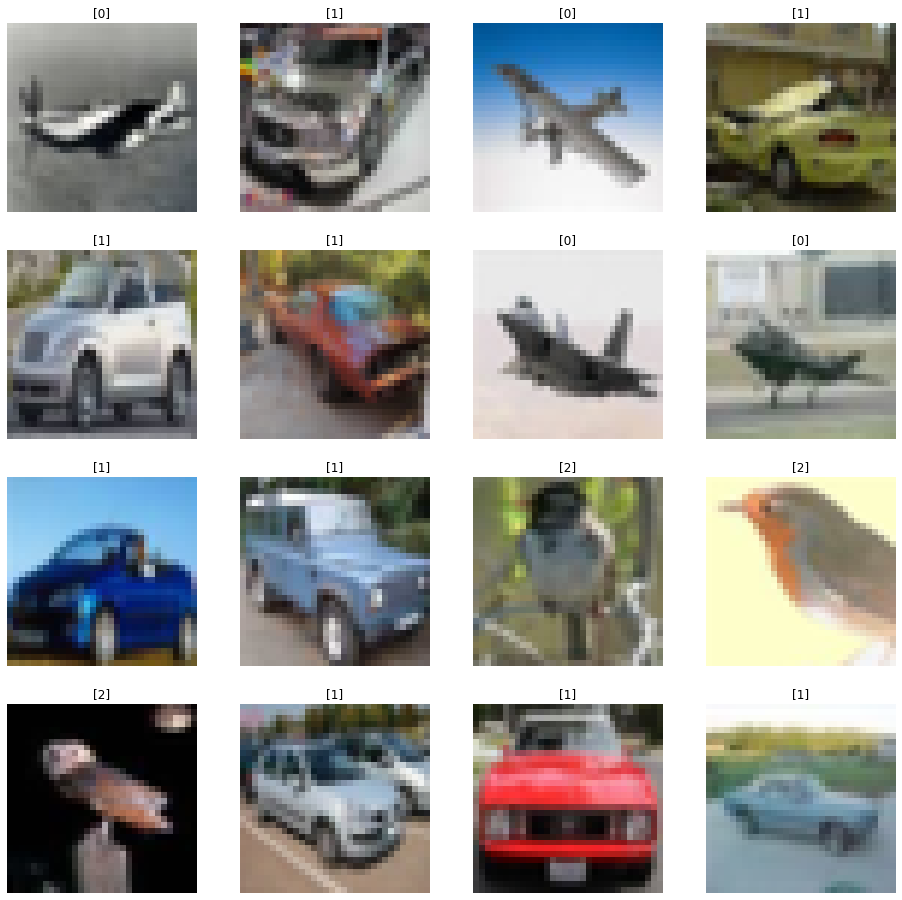

In [75]:
from tensorflow.keras.models import load_model
#from src.utils import load_cifar10
if __name__ == '__main__':

    # Load the test CIFAR-10 data
    (x_train, y_train), (x_test, y_test) = load_cifar10(num_classes=3)

#load the data
import os
import urllib.request as http
from zipfile import ZipFile

import tensorflow as tf
import numpy as np
from PIL import Image
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import save_model, load_model

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


def load_cifar10(num_classes=3):
    """
    Downloads CIFAR-10 dataset, which already contains a training and test set,
    and return the first `num_classes` classes.
    Example of usage:
    >>> (x_train, y_train), (x_test, y_test) = load_cifar10()
    :param num_classes: int, default is 3 as required by the assignment.
    :return: the filtered data.
    """
    (x_train_all, y_train_all), (x_test_all, y_test_all) = cifar10.load_data()

    fil_train = tf.where(y_train_all[:, 0] < num_classes)[:, 0]
    fil_test = tf.where(y_test_all[:, 0] < num_classes)[:, 0]

    y_train = y_train_all[fil_train]
    y_test = y_test_all[fil_test]

    x_train = x_train_all[fil_train]
    x_test = x_test_all[fil_test]

    return (x_train, y_train), (x_test, y_test)

#pre-process the data, reshape
def plot_sample(imgs, labels, nrows, ncols, resize=None, tograyscale=False):
    # create a grid of images
    fig, axs = plt.subplots(nrows, ncols, figsize=(4*ncols, 4*nrows))
    # take a random sample of images
    indices = np.random.choice(len(imgs), size=nrows*ncols, replace=False)
    for ax, idx in zip(axs.reshape(-1), indices):
        ax.axis('off')
        # sample an image
        ax.set_title(labels[idx])
        im = imgs[idx]
        if isinstance(im, np.ndarray):
            im = Image.fromarray(im)  
        if resize is not None:
            im = im.resize(resize)
        if tograyscale:
            im = im.convert('L')
        ax.imshow(im, cmap='gray')
plot_sample(x_train, y_train, 4, 4)

#pre-processing the data
def make_dataset(imgs, labels, label_map, img_size, rgb=True, keepdim=True, shuffle=True):
    x = []
    y = []
    n_classes = len(list(label_map.keys()))
    for im, l in zip(imgs, labels):
        # preprocess img
        x_i = im.resize(img_size)
        if not rgb:
            x_i = x_i.convert('L')
        x_i = np.asarray(x_i)
        if not keepdim:
            x_i = x_i.reshape(-1)
        
        # encode label
        y_i = np.zeros(n_classes)
        y_i[label_map[l]] = 1.
        
        x.append(x_i)
        y.append(y_i)
    x, y = np.array(x).astype('float32'), np.array(y)
    if shuffle:
        idxs = np.arange(len(y))
        np.random.shuffle(idxs)
        x, y = x[idxs], y[idxs]
    return x, y


def load_images(path):
    img_files = os.listdir(path)
    imgs, labels = [], []
    for i in img_files:
        if i.endswith('.jpg'):
            # load the image (here you might want to resize the img to save memory)
            imgs.append(Image.open(os.path.join(path, i)).copy())
    return imgs


def load_images_with_label(path, classes):
    imgs, labels = [], []
    for c in classes:
        # iterate over all the files in the folder
        c_imgs = load_images(os.path.join(path, c))
        imgs.extend(c_imgs)
        labels.extend([c] * len(c_imgs))
    return imgs, labels

idx_to_label = {
    0:'airplane',
    1:'automobile',
    2:'bird'
}


# normalize to (0-1)
x_train = x_train/255.
x_test = x_test/255.

# Pre-process targets, Create one-hot encoding of the labels.
from tensorflow.keras import utils
y_train = utils.to_categorical(y_train, 3)
y_test = utils.to_categorical(y_test, 3)

# Build a neural network with the following architecture:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout
# Build model
model = Sequential()
model.add(Conv2D(8, (5, 5), (1, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), (2, 2), activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation='tanh'))
model.add(Dense(3, activation='softmax'))

# Store number of parameters of the model
#fcnn_params = model.count_params()

# Compile the model
model.compile(optimizer=optimizers.Adam(lr=0.003), 
            loss='categorical_crossentropy',  
            metrics=['accuracy'])

#print("\nFCNN params: {:,} - CNN params: {:,}".format(fcnn_params, cnn_params))

# Train model
batch_size = 128
epochs = 500
# early stopping
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_split=0.2,
                    callbacks=[es])
model.summary()

# Evaluate model
scores = model.evaluate(x_test, y_test)
print('Test loss: {} - Accuracy: {}'.format(*scores))



94/94 [==============================] - 1s 6ms/step - loss: 0.3600 - accuracy: 0.8563
Test loss: 0.36003559827804565 - Accuracy: 0.856333315372467
Accuracy model task 1: 0.0


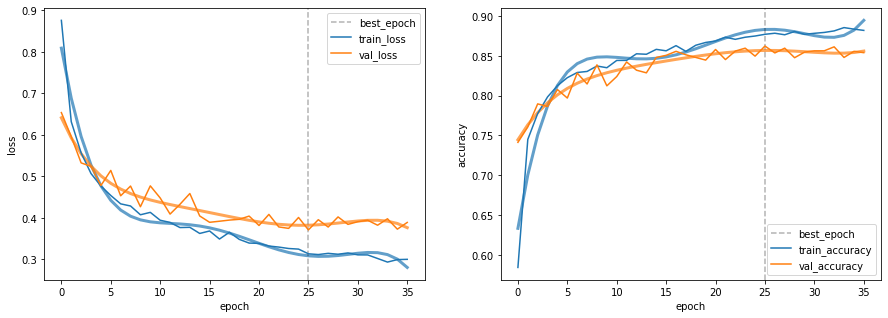

In [65]:
#PLOT
def plot_history(history):
    plt.figure(figsize=(15, 5))
    plt.subplot(121)

    # Auxiliary info and funcs
    best_epoch = np.argmin(history.history['val_loss'])
    epochs = history.epoch
    smooth = lambda y: np.polyval(np.polyfit(epochs, y, deg=5), epochs)

    # Plot training & validation accuracy values
    plt.plot(smooth(history.history['loss']), c='C0', alpha=0.7, lw=3)
    plt.plot(smooth(history.history['val_loss']), c='C1', alpha=0.7, lw=3)
    plt.axvline(best_epoch, label='best_epoch', c='k', ls='--', alpha=0.3)
    # Empirical values
    plt.plot(history.history['loss'], label='train_loss', c='C0')
    plt.plot(history.history['val_loss'], label='val_loss', c='C1')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()

    plt.subplot(122)
    # Plot training & validation accuracy values
    plt.plot(smooth(history.history['accuracy']), c='C0', alpha=0.7, lw=3)
    plt.plot(smooth(history.history['val_accuracy']), c='C1', alpha=0.7, lw=3)
    plt.axvline(best_epoch, label='best_epoch', c='k', ls='--', alpha=0.3)
    # Empirical values
    plt.plot(history.history['accuracy'], label='train_accuracy', c='C0')
    plt.plot(history.history['val_accuracy'], label='val_accuracy', c='C1')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend()

plot_history(history)
save_keras_model(model, './nn_task1.h5')

# Evaluate model: performance and accuracy
scores = model.evaluate(x_test, y_test)
print('Test loss: {} - Accuracy: {}'.format(*scores))

# Load the trained models (one or more depending on task and bonus)
# for example
model_task1 = load_model('./nn_task1.h5')


# Predict on the given samples
# for example
y_pred_task1 = model_task1.predict(x_test)

# Evaluate the missclassification error on the test set
# for example
assert y_test.shape == y_pred_task1.shape
acc1 = (y_test == y_pred_task1).mean()
print("Accuracy model task 1:", acc1)

In [72]:
#task 2
from tensorflow.keras import Input, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import losses
from tensorflow import keras
import tensorflow as tf
#1-D
# FFNN
classifier = Sequential()
n_classes = 3
classifier.add(Flatten())
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(n_classes, activation='softmax'))
# Compile the model
classifier.compile(optimizer=optimizers.Adam(lr=0.003), 
            loss='categorical_crossentropy',  
            metrics=['accuracy'])

# Train model
batch_size = 128
epochs = 500
# early stopping
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
task2 = classifier.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    validation_split=0.2,
                    callbacks=[es])
classifier.summary()

# Evaluate model
scores = model.evaluate(x_test, y_test)
print('Test loss: {} - Accuracy: {}'.format(*scores))
#PLOT
def plot_task2(task2):
    plt.figure(figsize=(15, 5))
    plt.subplot(121)

    # Auxiliary info and funcs
    best_epoch = np.argmin(task2.task2['val_loss'])
    epochs = task2.epoch
    smooth = lambda y: np.polyval(np.polyfit(epochs, y, deg=5), epochs)

    # Plot training & validation accuracy values
    plt.plot(smooth(task2.task2['loss']), c='C0', alpha=0.7, lw=3)
    plt.plot(smooth(task2.task2['val_loss']), c='C1', alpha=0.7, lw=3)
    plt.axvline(best_epoch, label='best_epoch', c='k', ls='--', alpha=0.3)
    # Empirical values
    plt.plot(task2.task2['loss'], label='train_loss', c='C0')
    plt.plot(task2.task2['val_loss'], label='val_loss', c='C1')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()

    plt.subplot(122)
    # Plot training & validation accuracy values
    plt.plot(smooth(task2.task2['accuracy']), c='C0', alpha=0.7, lw=3)
    plt.plot(smooth(task2.task2['val_accuracy']), c='C1', alpha=0.7, lw=3)
    plt.axvline(best_epoch, label='best_epoch', c='k', ls='--', alpha=0.3)
    # Empirical values
    plt.plot(task2.task2['accuracy'], label='train_accuracy', c='C0')
    plt.plot(task2.task2['val_accuracy'], label='val_accuracy', c='C1')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend()

plot_task2(task2)
save_keras_model(classifier, './nn_task2.h5')

# Evaluate model: performance and accuracy
scores2 = classifier.evaluate(x_test, y_test)
print('Test loss: {} - Accuracy: {}'.format(*scores))

# Load the trained models (one or more depending on task and bonus)
# for example
model_task2 = load_model('./nn_task2.h5')


# Predict on the given samples
# for example
y_pred_task2 = model_task2.predict(x_test)

# Evaluate the missclassification error on the test set
# for example
assert y_test.shape == y_pred_task2.shape
acc2 = (y_test == y_pred_task2).mean()
print("Accuracy model task 2:", acc2)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


ValueError: ignored